In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

C:\Users\Acer-Sc\anaconda3\ANA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importing Libraries

In [2]:
df= pd.read_csv('C:\\Users\\Acer-Sc\\Downloads\\Google_Stock_Price_Train.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
df_train=df.iloc[:, 1:2].values

### Scaling

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
df_train_scaled = sc.fit_transform(df_train)

In [5]:
df_train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
len(df_train_scaled)

1258

### Preparing data chunks

In [7]:
X_train = []
y_train = []
k = 40

In [8]:
for i in range(k, len(df_train_scaled)):
    X_train.append(df_train_scaled[i-k:i, 0])
    y_train.append(df_train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1218, 40)

In [10]:
y_train.shape

(1218,)

### Reshaping data for LSTM NN

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
stock_predictor = Sequential()

In [14]:
stock_predictor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
stock_predictor.add(Dropout(0.2))
stock_predictor.add(LSTM(units = 64, return_sequences = True))
stock_predictor.add(Dropout(0.2))
stock_predictor.add(LSTM(units = 64, return_sequences = True))
stock_predictor.add(Dropout(0.2))
stock_predictor.add(LSTM(units = 64, return_sequences = True))
stock_predictor.add(Dropout(0.2))
stock_predictor.add(LSTM(units = 32))
stock_predictor.add(Dropout(0.2))
stock_predictor.add(Dense(units = 1))

### Compiling LSTM

In [15]:
stock_predictor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### RNN Training

In [16]:
stock_predictor.fit(X_train, y_train, epochs = 75, batch_size = 32, verbose=2)

Epoch 1/75
39/39 - 16s - loss: 0.0349 - 16s/epoch - 419ms/step
Epoch 2/75
39/39 - 3s - loss: 0.0097 - 3s/epoch - 80ms/step
Epoch 3/75
39/39 - 3s - loss: 0.0096 - 3s/epoch - 81ms/step
Epoch 4/75
39/39 - 3s - loss: 0.0073 - 3s/epoch - 85ms/step
Epoch 5/75
39/39 - 3s - loss: 0.0066 - 3s/epoch - 87ms/step
Epoch 6/75
39/39 - 4s - loss: 0.0065 - 4s/epoch - 95ms/step
Epoch 7/75
39/39 - 4s - loss: 0.0055 - 4s/epoch - 94ms/step
Epoch 8/75
39/39 - 4s - loss: 0.0054 - 4s/epoch - 102ms/step
Epoch 9/75
39/39 - 4s - loss: 0.0055 - 4s/epoch - 95ms/step
Epoch 10/75
39/39 - 4s - loss: 0.0058 - 4s/epoch - 94ms/step
Epoch 11/75
39/39 - 4s - loss: 0.0068 - 4s/epoch - 93ms/step
Epoch 12/75
39/39 - 4s - loss: 0.0061 - 4s/epoch - 95ms/step
Epoch 13/75
39/39 - 4s - loss: 0.0051 - 4s/epoch - 98ms/step
Epoch 14/75
39/39 - 4s - loss: 0.0050 - 4s/epoch - 99ms/step
Epoch 15/75
39/39 - 4s - loss: 0.0046 - 4s/epoch - 93ms/step
Epoch 16/75
39/39 - 4s - loss: 0.0048 - 4s/epoch - 93ms/step
Epoch 17/75
39/39 - 4s - loss

### Predictions

In [17]:
df_test = pd.read_csv('C:\\Users\\Acer-Sc\\Downloads\\Google_Stock_Price_Test.csv')
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [18]:
real_price = df_test.iloc[:, 1:2].values

### RNN Predictions

In [19]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
df_total.tail(25)

1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, dtype: float64

### Getting the last k values

In [20]:
z = len(df_total) - len(df_test) - k

In [21]:
test_input = df_total[z:].values

C:\Users\Acer-Sc\AppData\Local\Temp\ipykernel_11220\4118253444.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_input = df_total[z:].values


### Scaling test input

In [23]:
test_input = test_input.reshape(-1,1)
test_input = sc.transform(test_input)

In [24]:
len(test_input)

60

### Preparing test input for feeding to RNN for prediction

In [25]:
X_test= []
for i in range(k, len(test_input)):
    X_test.append(test_input[i-k:i, 0])
X_test = np.array(X_test)

In [26]:
X_test.shape

(20, 40)

In [27]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### RNN predictions

In [28]:
pred_price = stock_predictor.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [29]:
pred_price.shape

(20, 1)

### Inverse scaling predicted price

In [30]:
pred_price = sc.inverse_transform(pred_price)

### Visualising Results

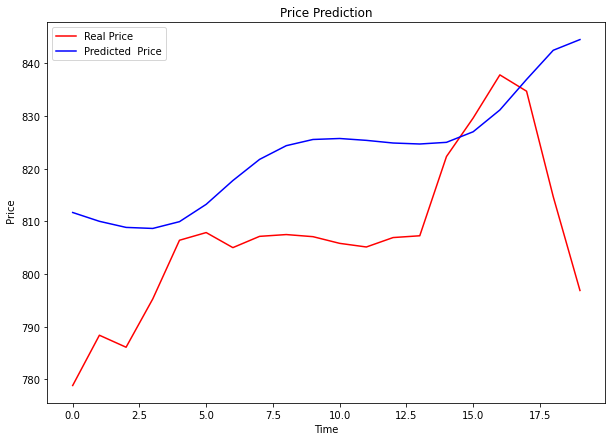

In [33]:
plt.figure (figsize = (10,7))
plt.plot(real_price, color = 'red', label = 'Real Price')
plt.plot(pred_price, color = 'blue', label = 'Predicted  Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Price')
plt.legend()
plt.show()